Loading Data

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = yf.download('TSLA', period='5y', interval='1d')

/tmp/ipython-input-3826936803.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TSLA', period='5y', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-08-03,99.000000,100.653999,96.292000,96.613335,132139500
2020-08-04,99.133331,101.827332,97.466667,99.667336,126225000
2020-08-05,99.001335,99.989334,97.887337,99.532669,74217000
2020-08-06,99.305336,101.153999,98.484001,99.388664,89884500
2020-08-07,96.847336,99.983330,94.334000,99.969330,133446000


In [ ]:
data.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [ ]:
df = data[[('Close', 'TSLA')]].copy()
df.columns = ['Close']
df.reset_index(inplace=True)

In [ ]:
df.head()

,Date,Close
0,2020-08-03,99.000000
1,2020-08-04,99.133331
2,2020-08-05,99.001335
3,2020-08-06,99.305336
4,2020-08-07,96.847336


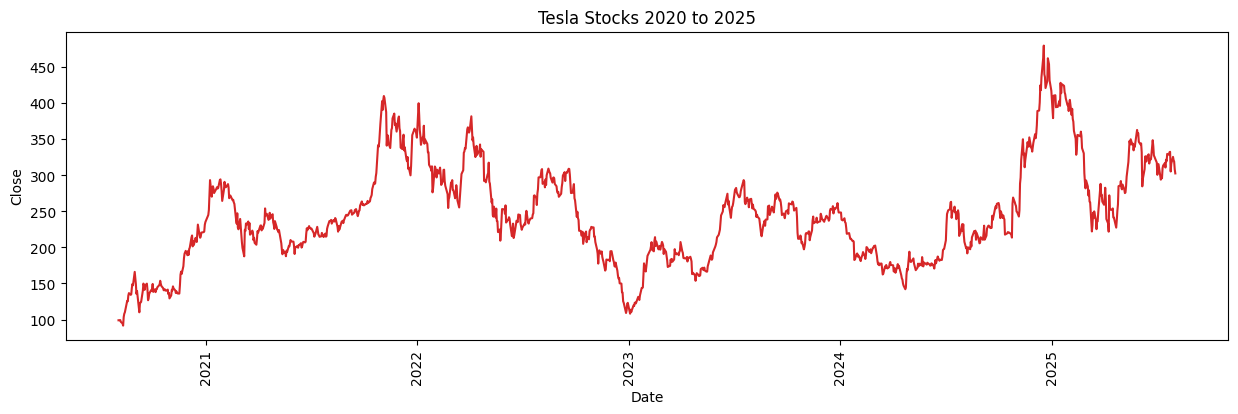

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Close', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    # ax.set_xticks(ax.get_xticks()[::2])
    plt.xticks(rotation=90)
    plt.show()


plot_df(df, x=df['Date'], y=df['Close'], title='Tesla Stocks 2020 to 2025')

# Multiplicative Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)

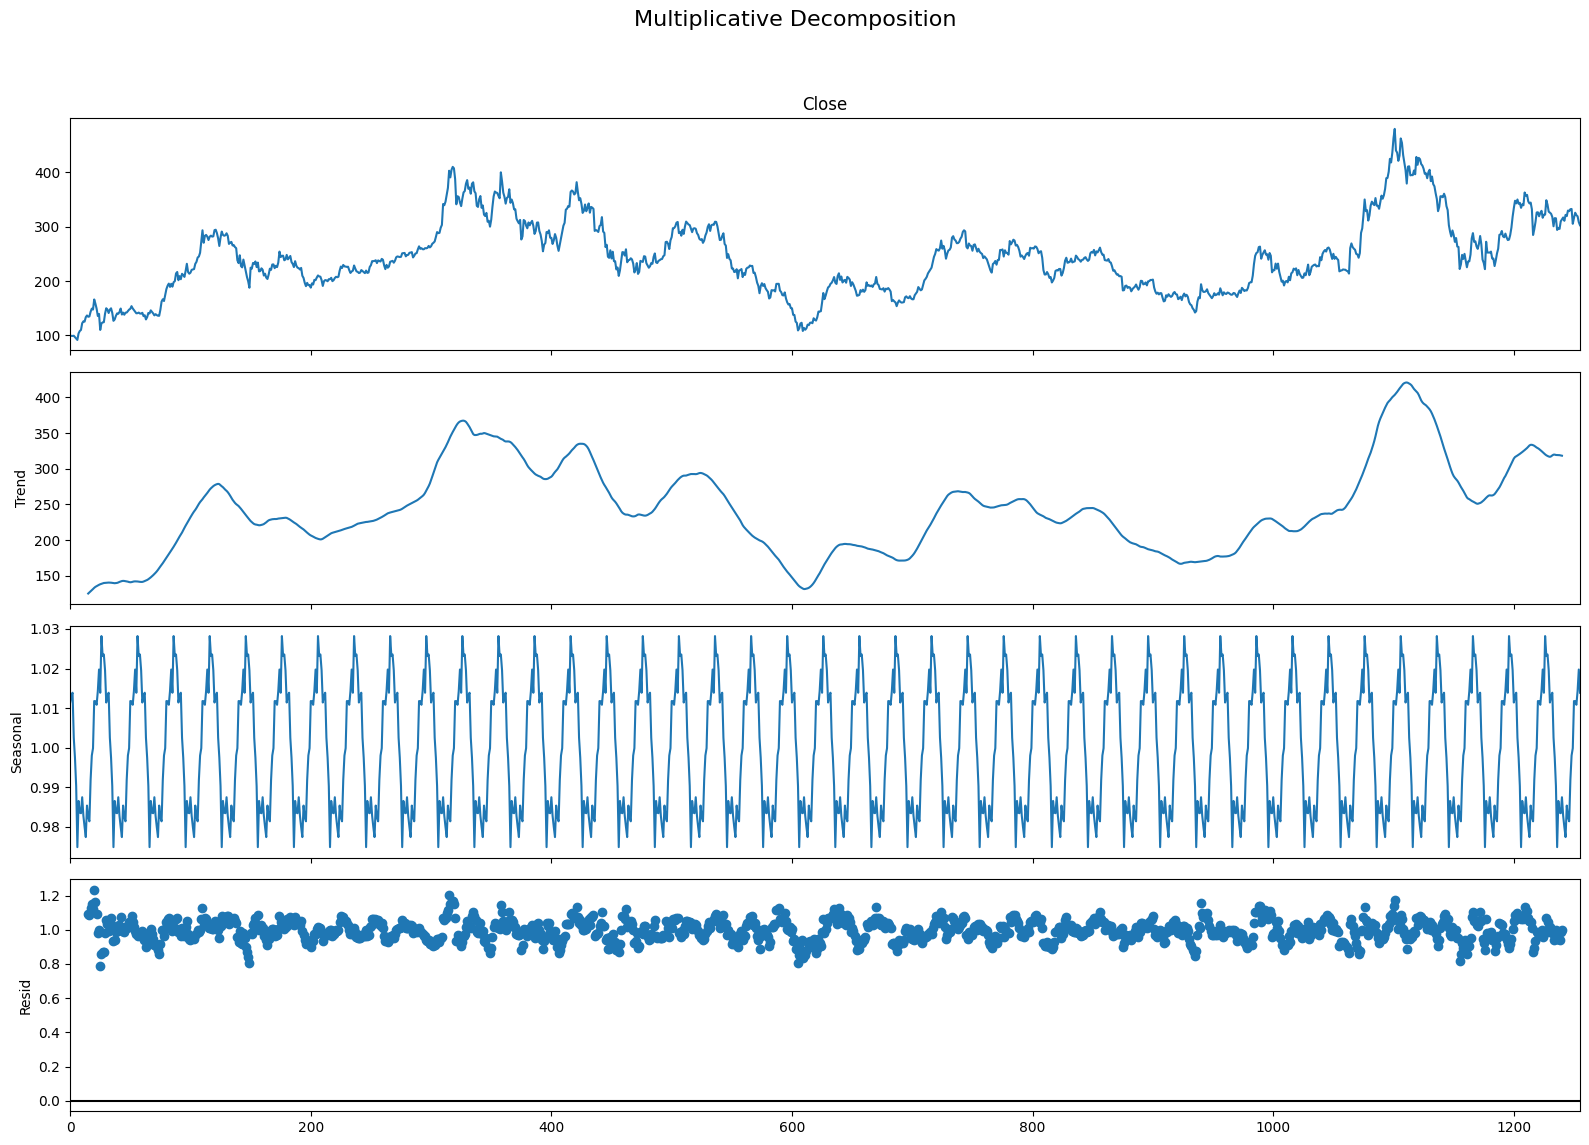

In [ ]:
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Additive Decompositon

In [ ]:
# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Close'], model='additive', period=30)

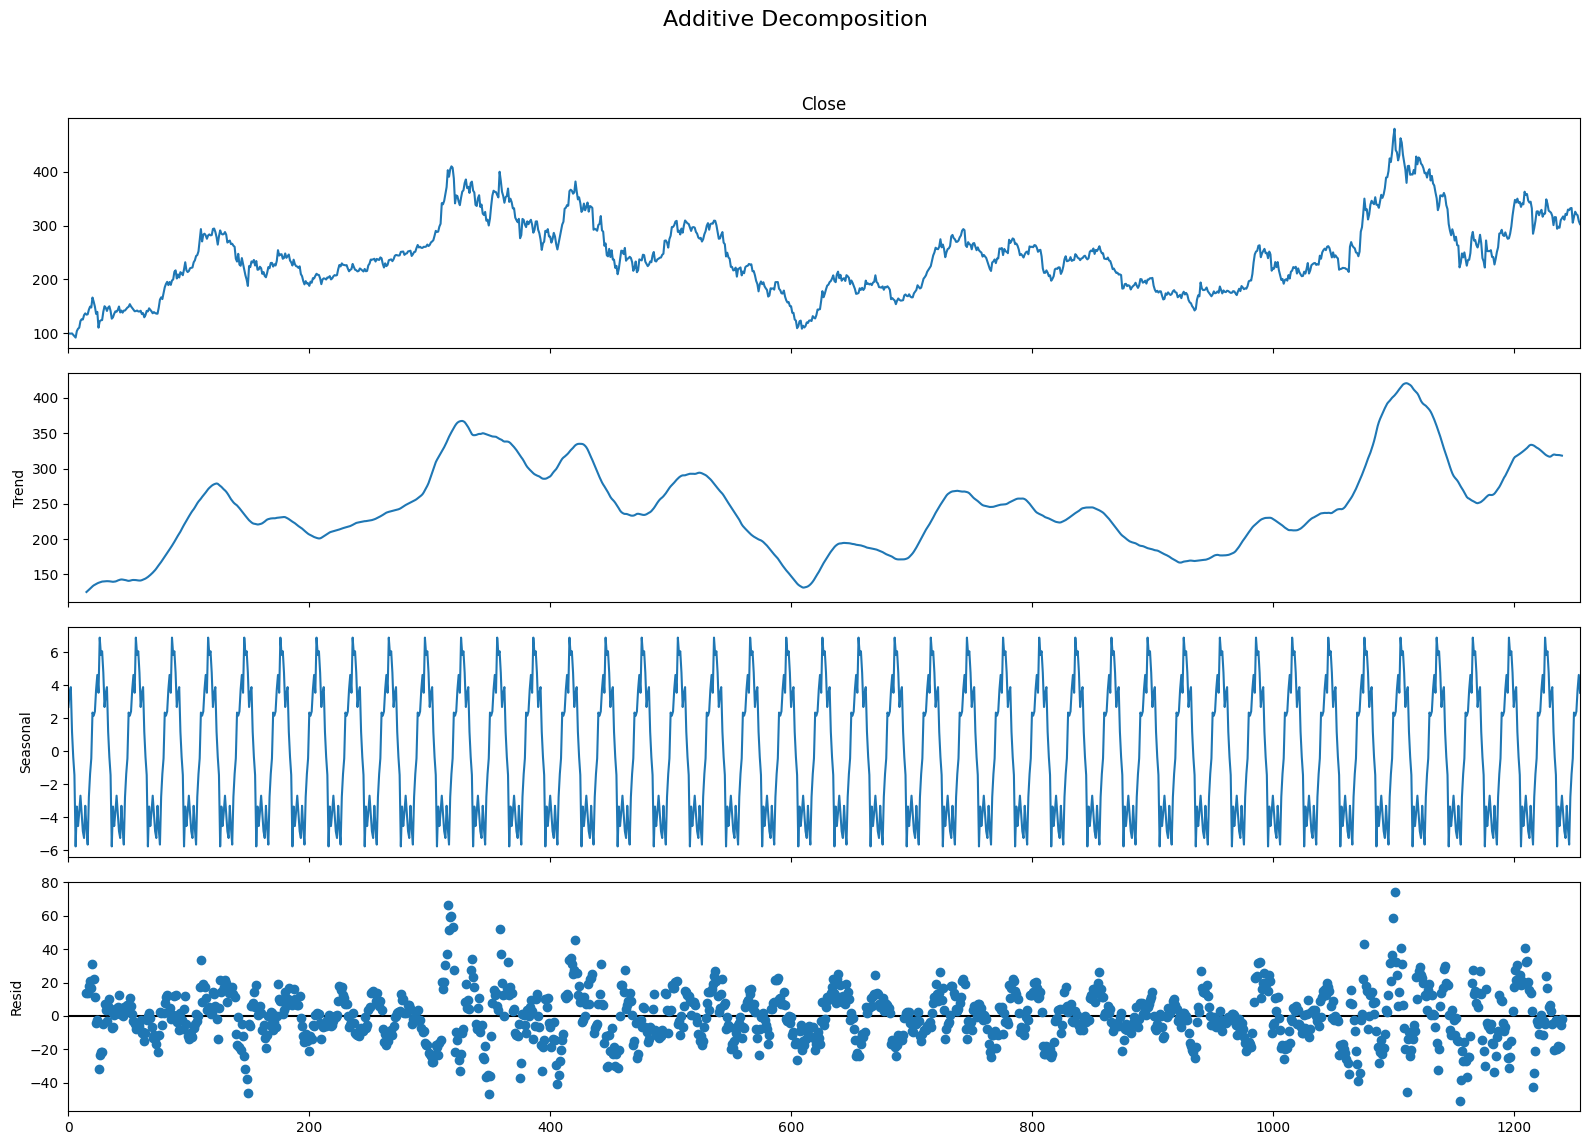

In [ ]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Multiplicative Decompositon is considered for this case as it does not reflect any patterns

#Additive decompostion shows some growth around 400 and in between 100 and 1200(Residuals shouldin't show any patterns related to the data )

# Now Let's check for Stationary !

In [ ]:
 #Augmented Dickey-Fuller (ADF) Test
 from statsmodels.tsa.stattools import adfuller

# Assume 'df' has 'Date' and 'Close' columns
ts = df['Close']

adf_result = adfuller(ts)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -3.089279322633863
p-value: 0.027356806706957466
Critical Values: {'1%': -3.4356133204636095, '5%': -2.8638642784217305, '10%': -2.5680074748794373}


In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(ts, regression='c', nlags="auto")

print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:', kpss_result[3])

KPSS Statistic: 0.6171028797482505
p-value: 0.02108155638652268
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
pip install arch

In [ ]:
from arch.unitroot import PhillipsPerron

pp_test = PhillipsPerron(ts)

print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.151
P-value                         0.023
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


| Test        | p-value | Interpretation                          |
| ----------- | ------- | --------------------------------------- |
| **ADF**     | 0.027   | 🔥 Reject H₀ → Likely **stationary**    |
| **KPSS**    | 0.021   | ❌ Reject H₀ → Likely **non-stationary** |
| **PP Test** | 0.023   | 🔥 Reject H₀ → Likely **stationary**    |


Let's do differencing then check !

In [ ]:
df['Close_diff'] = df['Close'].diff()

In [ ]:
ts = ts.dropna()

In [ ]:
ts.head()

,Close
0,99.000000
1,99.133331
2,99.001335
3,99.305336
4,96.847336


In [ ]:
# Assume 'df' has 'Date' and 'Close' columns
adf_result = adfuller(ts)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -3.089279322633863
p-value: 0.027356806706957466
Critical Values: {'1%': -3.4356133204636095, '5%': -2.8638642784217305, '10%': -2.5680074748794373}


In [ ]:
kpss_result = kpss(ts, regression='c', nlags="auto")

print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:', kpss_result[3])

KPSS Statistic: 0.6171028797482505
p-value: 0.02108155638652268
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
pp_test = PhillipsPerron(ts)

print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.151
P-value                         0.023
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


##After Differencing
| Test     | Test Stat | p-value | Decision (α = 0.05)               |
| -------- | --------- | ------- | --------------------------------  |
| **ADF**  | -10.52    | \~0.0   | ✅ Reject H₀ → Stationary         |
| **PP**   | -35.91    | \~0.0   | ✅ Reject H₀ → Stationary         |
| **KPSS** | 0.063     | > 0.1   | ✅ Fail to reject H₀ → Stationary |


# After Differencing all three test agree that our data is now stationary

Let's Detrend

In [ ]:
df.columns

Index(['Date', 'Close', 'Close_diff'], dtype='object')

In [ ]:
df=df.drop(columns='Close_diff')

Text(0.5, 1.0, 'Closing detrended by subtracting the least squares fit')

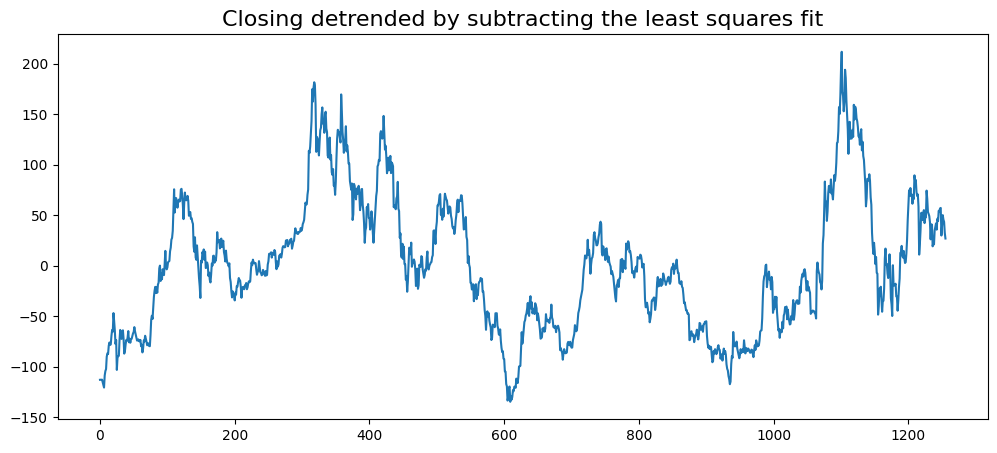

In [ ]:
# Using scipy: Subtract the line of best fit
plt.figure(figsize=(12,5))
from scipy import signal
detrended = signal.detrend(df['Close'].values)
plt.plot(detrended)
plt.title('Closing detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Closing detrended by subtracting the trend component')

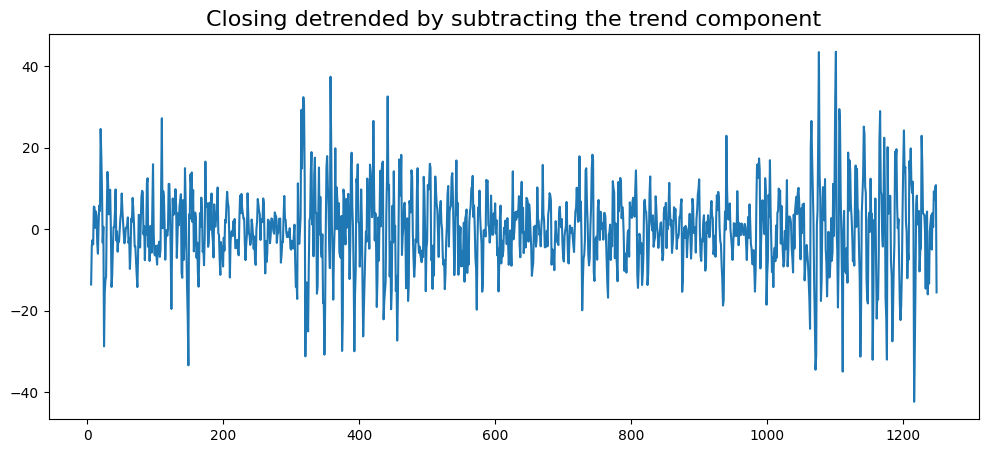

In [ ]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['Close'], model='multiplicative', period=12)
detrended = df['Close'].values - result_mul.trend
plt.figure(figsize=(12,5), dpi=100)
plt.plot(detrended)
plt.title('Closing detrended by subtracting the trend component', fontsize=16)

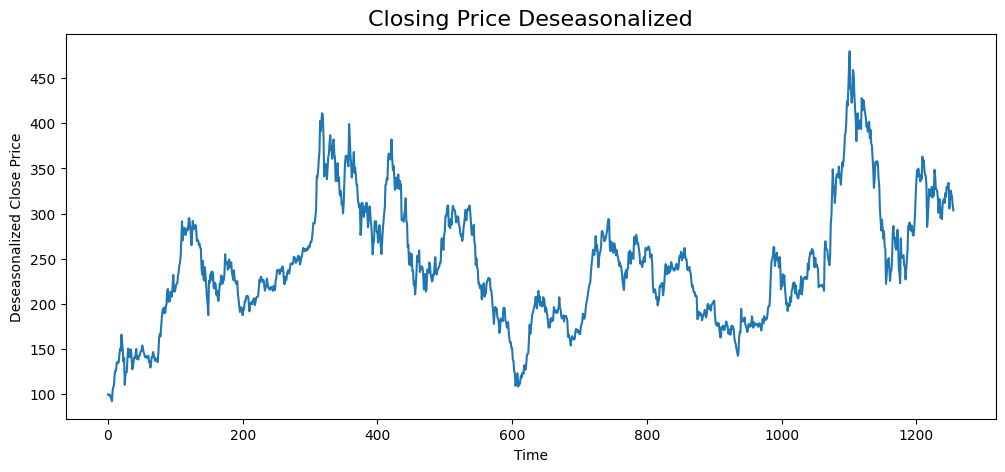

In [ ]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['Close'], model='multiplicative', period=12)

# Deseasonalize
deseasonalized = df['Close'].values / result_mul.seasonal

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(deseasonalized)
plt.title('Closing Price Deseasonalized', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Deseasonalized Close Price')
plt.show()

After deseonalising the data there is no change it almost looks the same as before meaning there is no seaonality is the data !

Let's Check for Sesonality !

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

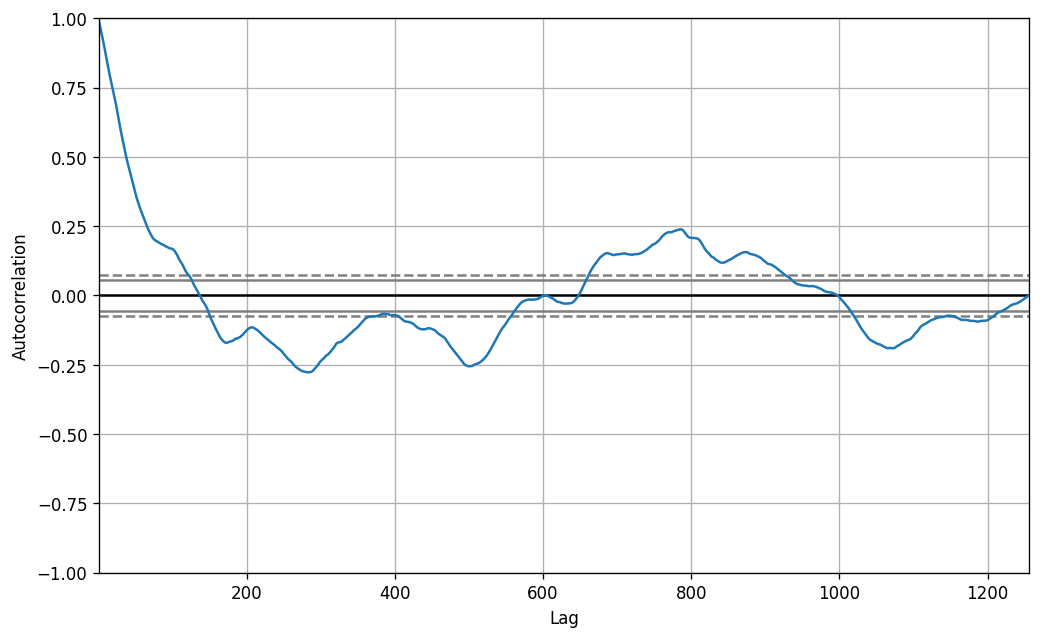

In [ ]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Close'].tolist())

# No strong Seasonality

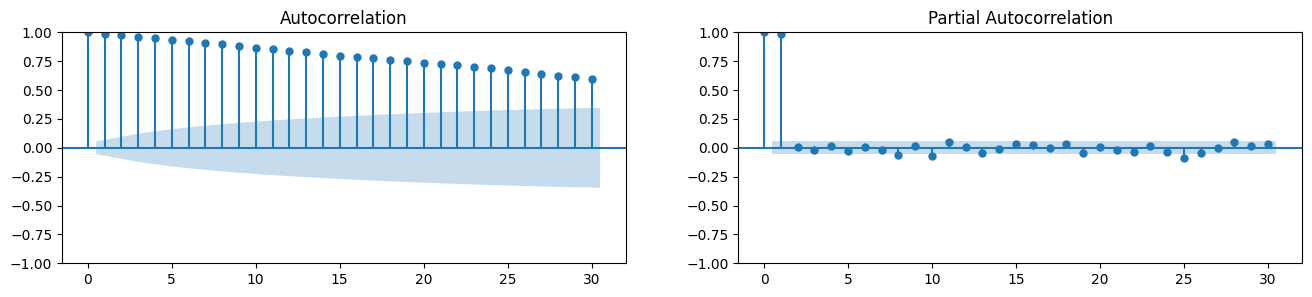

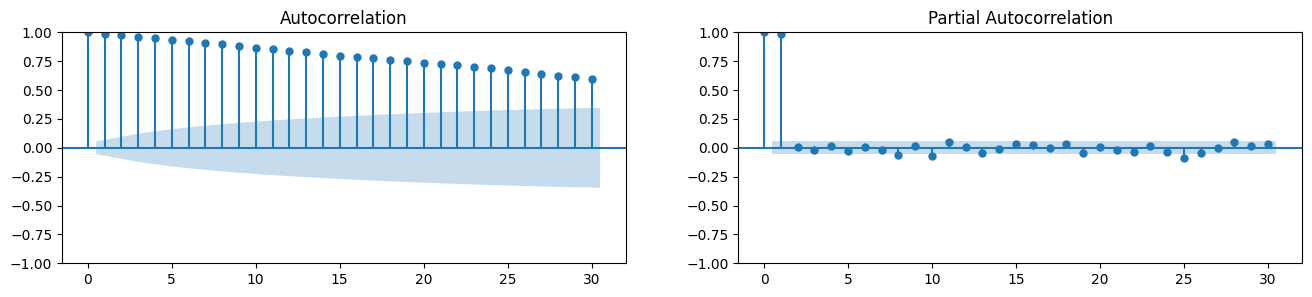

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Close'].tolist(), lags=30, ax=axes[0])
plot_pacf(df['Close'].tolist(), lags=30, ax=axes[1])

AutoCorrelation: Most values are Statistically significant

Partial AutoCorrelation : except second last all values are Statistically insignificant

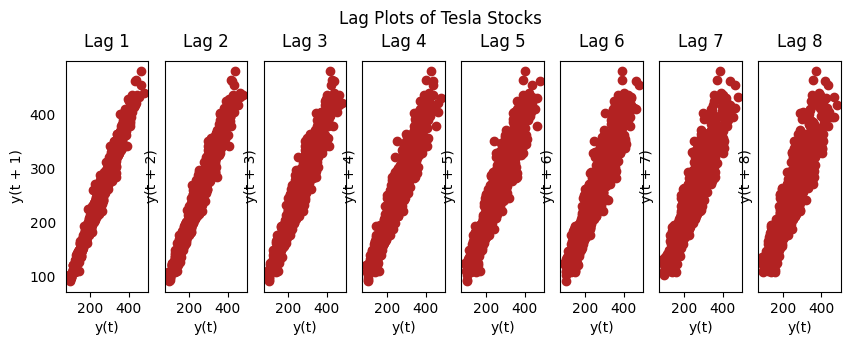

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 8, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(df['Close'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Tesla Stocks', y=1.05)
plt.show()

Gradual decay in correlation over lags

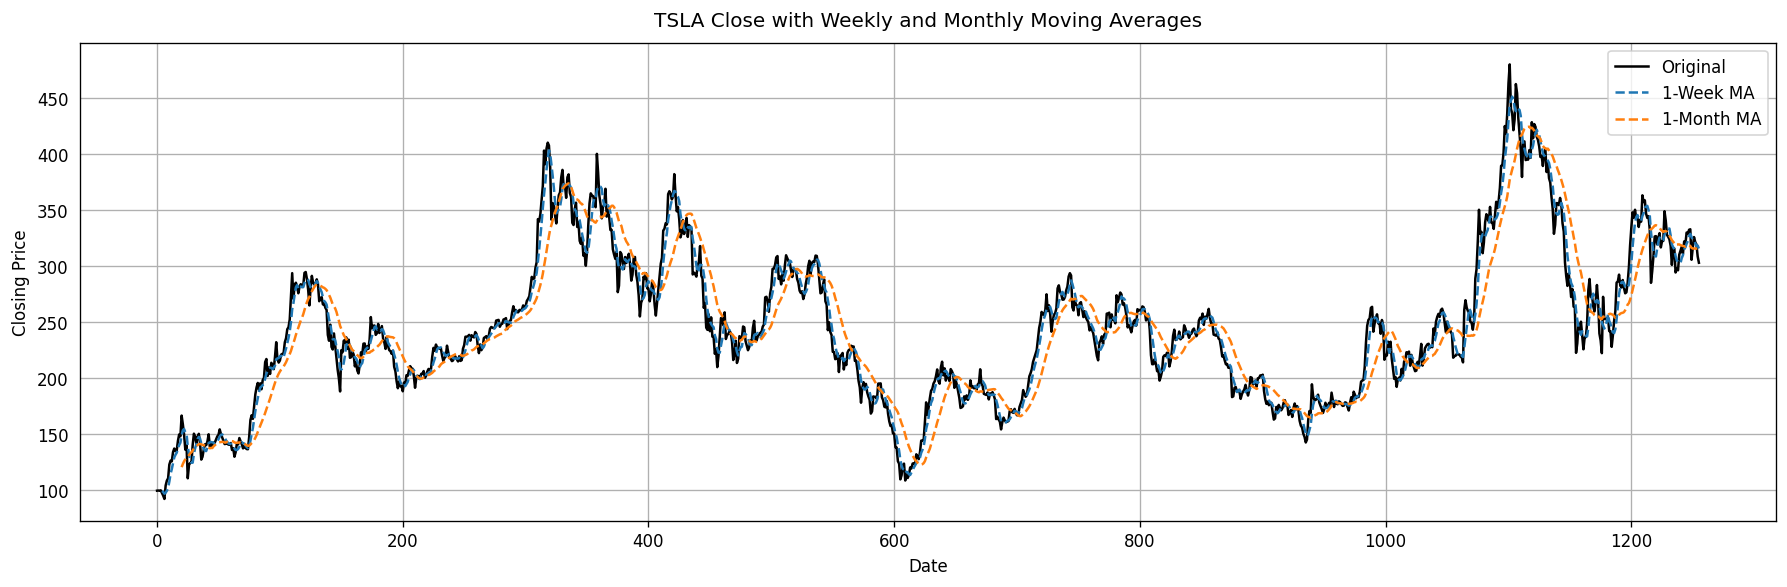

In [ ]:
df['MA_1W'] = df['Close'].rolling(window=5).mean()
df['MA_1M'] = df['Close'].rolling(window=21).mean()

plt.figure(figsize=(15,5))
plt.plot(df['Close'], label='Original', color='black')
plt.plot(df['MA_1W'], label='1-Week MA', linestyle='--')
plt.plot(df['MA_1M'], label='1-Month MA', linestyle='--')

plt.title('TSLA Close with Weekly and Monthly Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


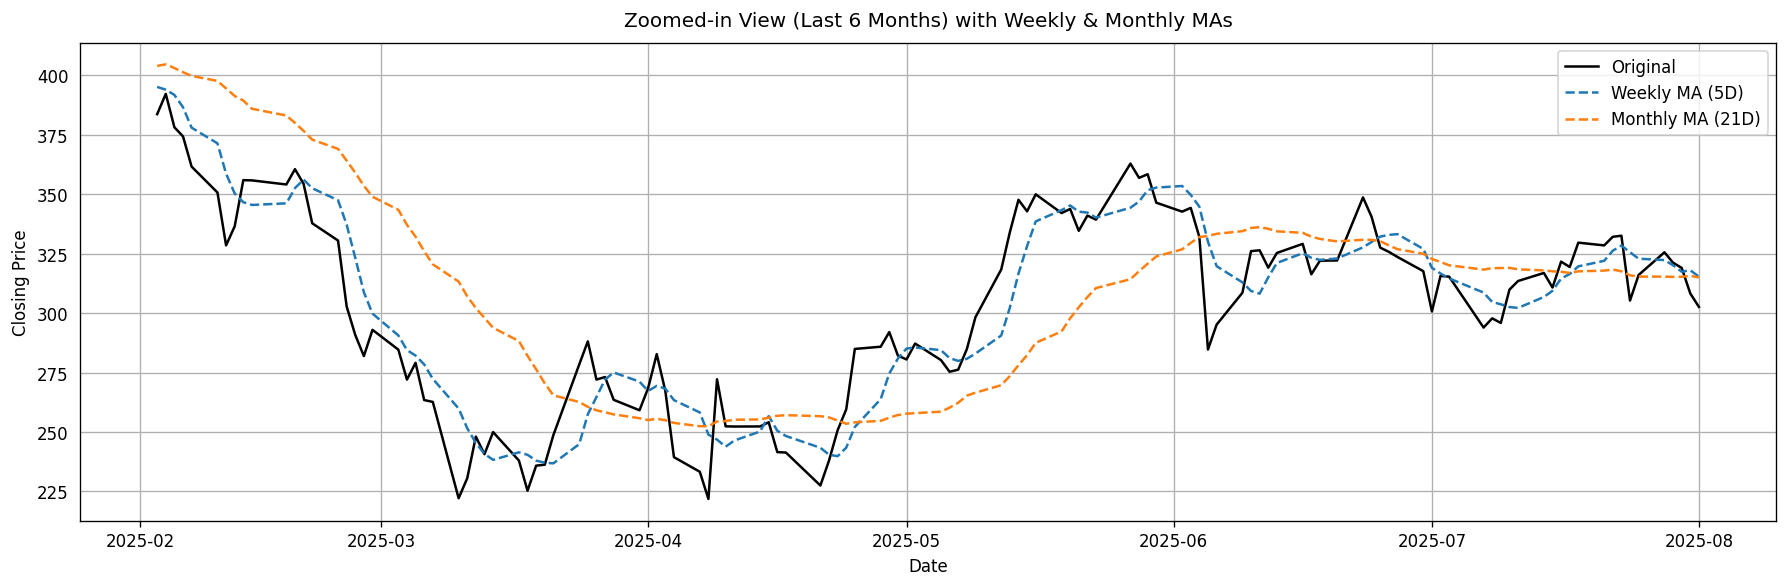

In [ ]:
# Weekly and Monthly Moving Averages (assuming daily data)
df['MA_weekly'] = df['Close'].rolling(window=5).mean()    # approx. 5 trading days in a week
df['MA_monthly'] = df['Close'].rolling(window=21).mean()  # approx. 21 trading days in a month

df.set_index('Date', inplace=True) # Set 'Date' as the index

end_date = df.index.max()
start_date = end_date - pd.DateOffset(months=6)
zoom_df = df.loc[start_date:end_date]

# Plot
plt.figure(figsize=(15,5))
plt.plot(zoom_df['Close'], label='Original', color='black')
plt.plot(zoom_df['MA_weekly'], label='Weekly MA (5D)', linestyle='--')
plt.plot(zoom_df['MA_monthly'], label='Monthly MA (21D)', linestyle='--')

plt.title('Zoomed-in View (Last 6 Months) with Weekly & Monthly MAs')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Last 6 months

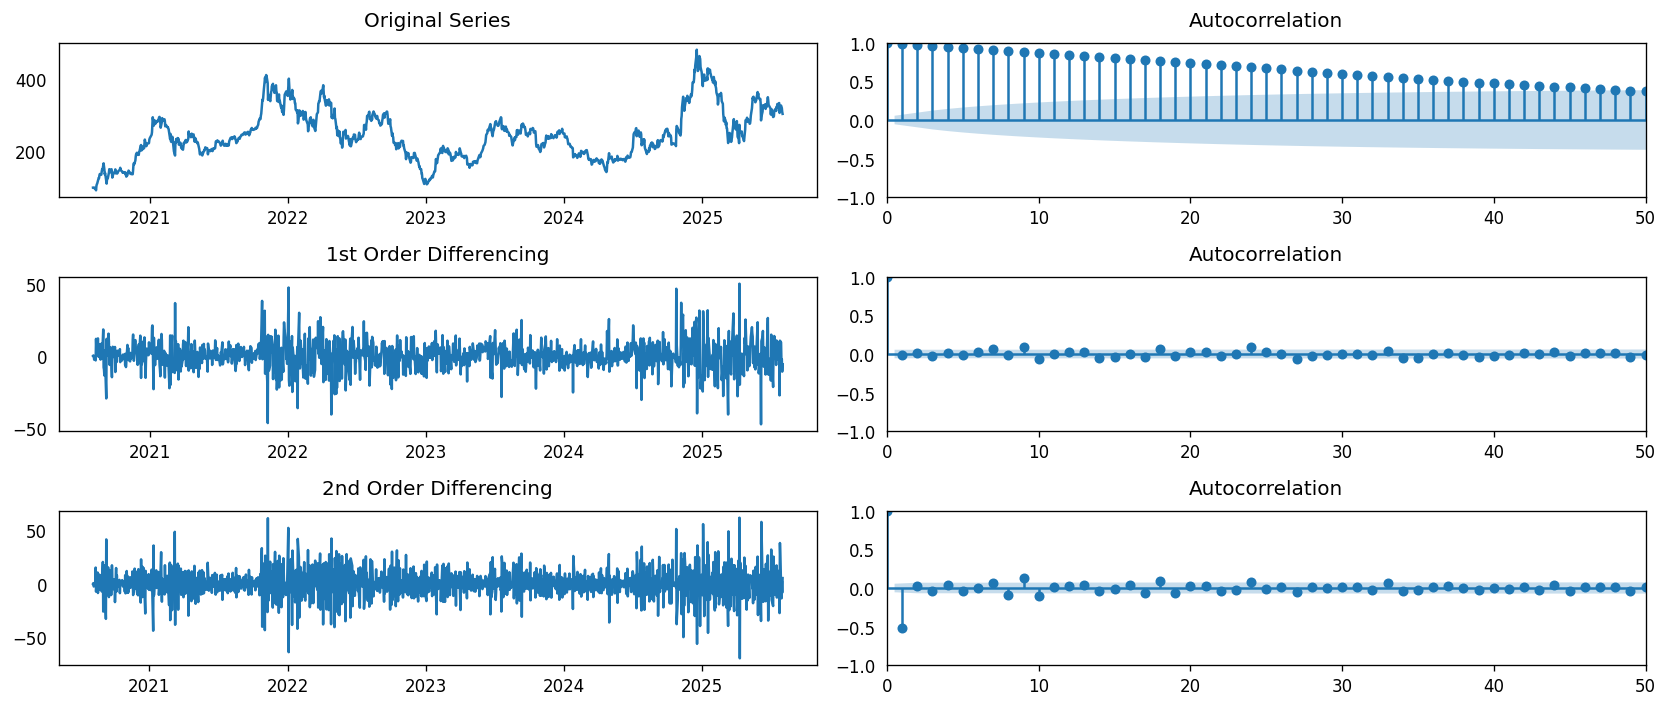

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize': (14, 6), 'figure.dpi': 120})

fig, axes = plt.subplots(3, 2, sharex=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot original series
axes[0, 0].plot(df['Close'])
axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1], lags=50)
axes[0, 1].set_xlim([0, 50])  # Limit ACF x-axis to 50 lags

# First differencing
axes[1, 0].plot(df['Close'].diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1], lags=50)
axes[1, 1].set_xlim([0, 50])

# Second differencing
axes[2, 0].plot(df['Close'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1], lags=50)
axes[2, 1].set_xlim([0, 50])

plt.tight_layout()
plt.show()

We can Obser after fisrt order Differencing the data seems stable around Zero and its autocoration does not show any spikes meaning d = 1 For ARIMA

q = 0 or 1 (0 most probably) because after first order differenceing almost all the values falls under confidance making them insignificant

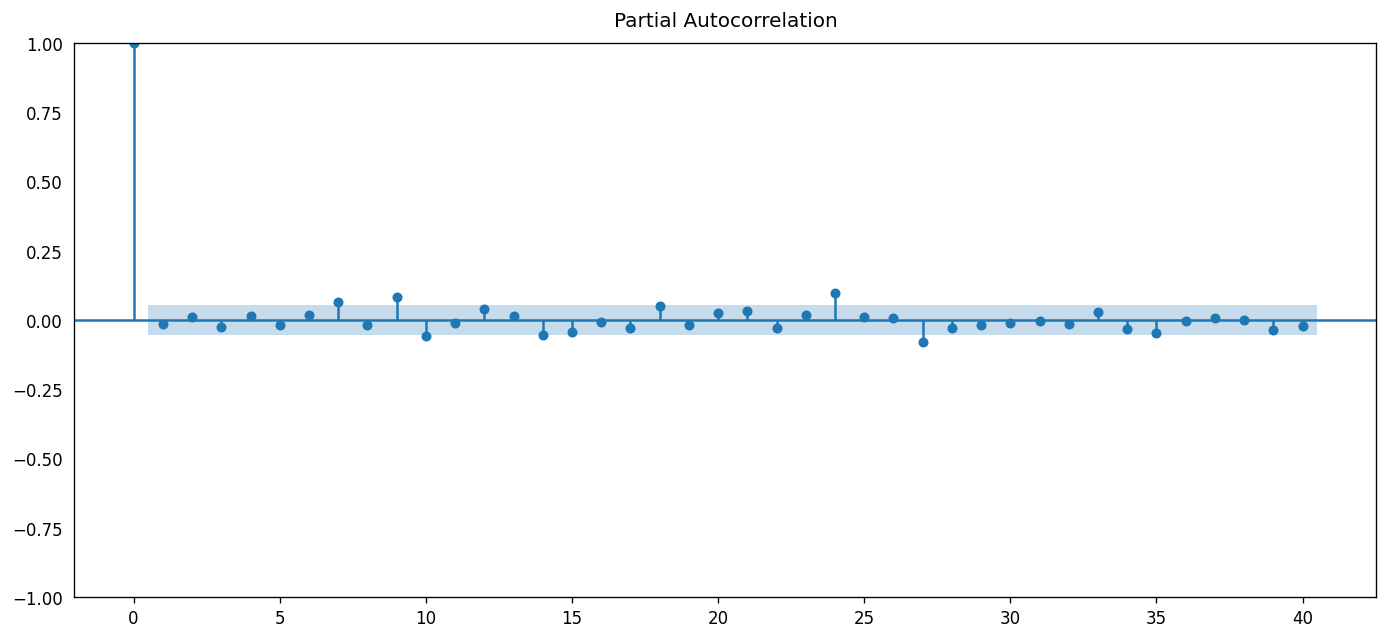

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close'].diff().dropna(), lags=40)
plt.show()


P = 1 For ARIMA Because all other values falls under the confidance meanining they are statistically insignificant

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# d = 1 , p = 1 , q = 0
model = ARIMA(df['Close'], order=(1, 1, 1))  # example
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1256
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4660.723
Date:                Sun, 03 Aug 2025   AIC                           9327.447
Time:                        11:17:14   BIC                           9342.851
Sample:                             0   HQIC                          9333.237
                               - 1256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6104      0.654     -0.934      0.350      -1.892       0.671
ma.L1          0.5898      0.666      0.885      0.376      -0.716       1.896
sigma2        98.4519      2.441     40.331      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


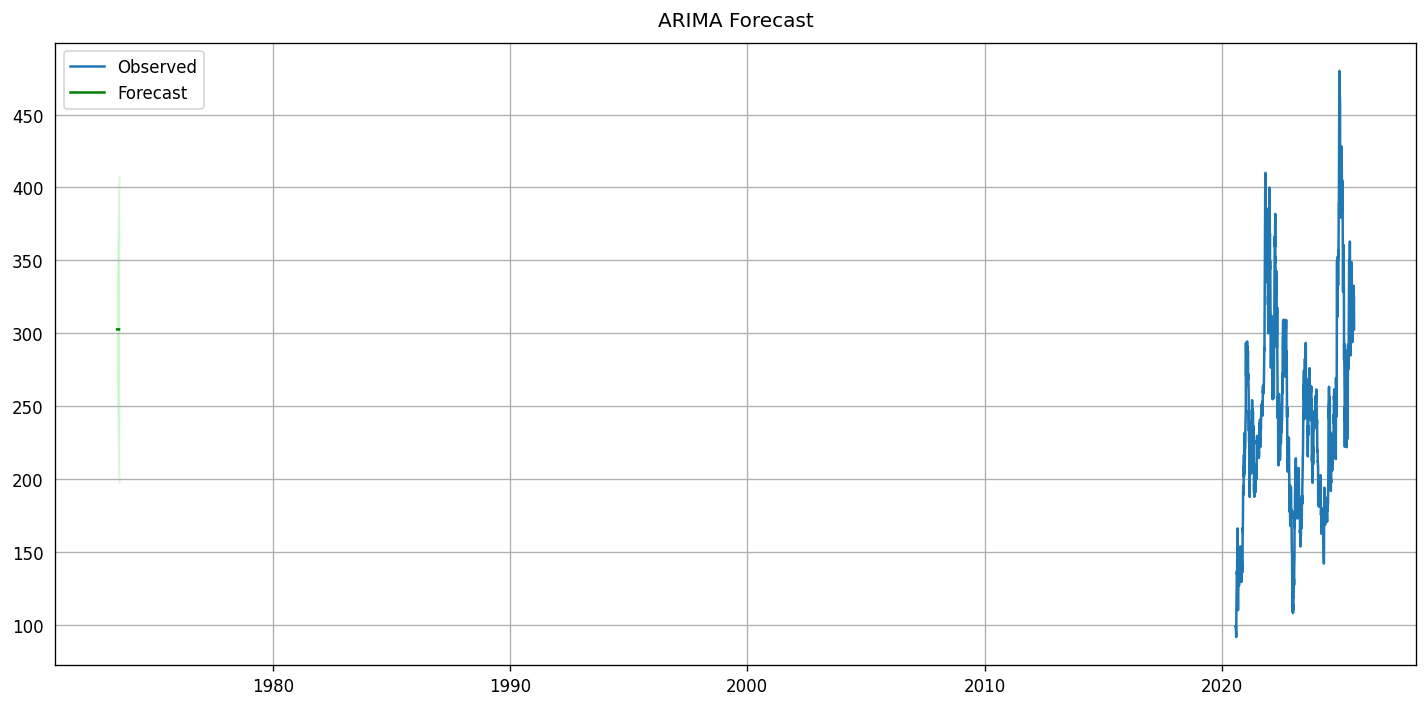

In [ ]:
forecast_steps = 30  # days

forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Observed')
plt.plot(forecast_df['mean'], label='Forecast', color='green')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'],
                 color='lightgreen', alpha=0.3)
plt.legend()
plt.title('ARIMA Forecast')
plt.grid(True)
plt.tight_layout()
plt.show()


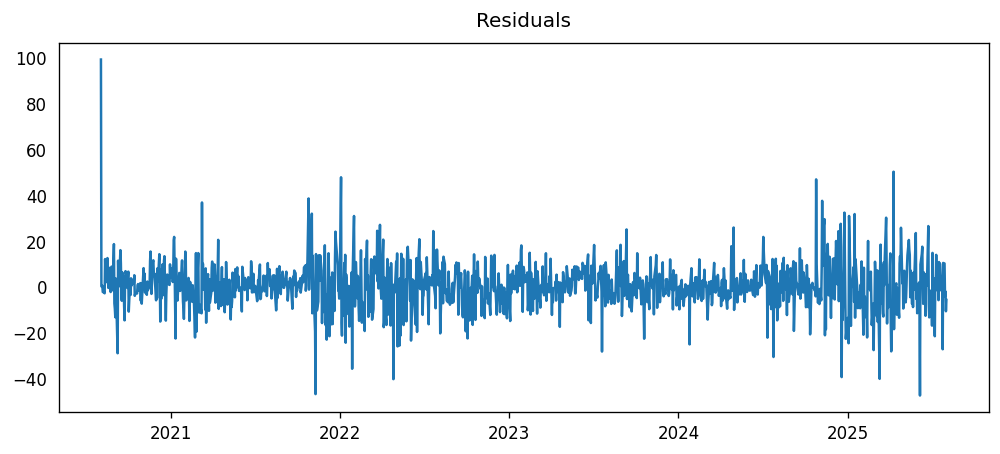

In [ ]:
residuals = model_fit.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals")
plt.show()

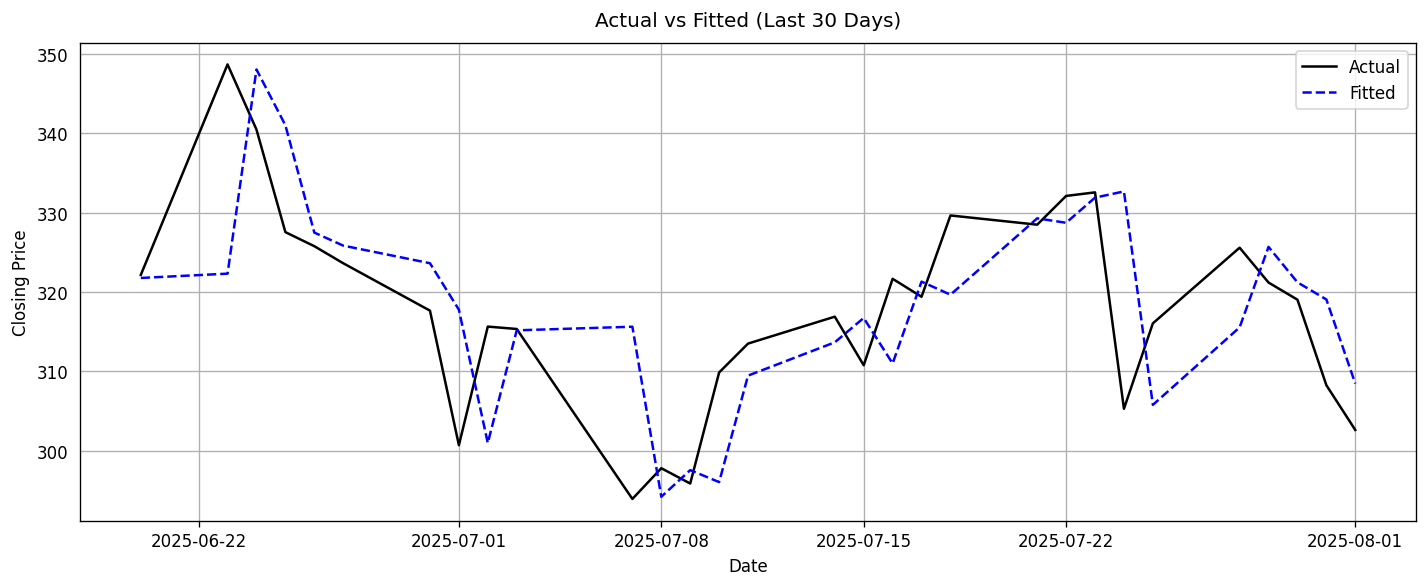

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the last 30 days of data
last_30 = df.iloc[-30:]

# Get fitted values from model (already trained on full series)
fitted_values = model_fit.fittedvalues

# Align fitted values to the original data (optional smoothing)
fitted_last_30 = fitted_values[-30:]

# Plot actual vs fitted
plt.figure(figsize=(12, 5))
plt.plot(last_30.index, last_30['Close'], label='Actual', color='black')
plt.plot(last_30.index, fitted_last_30, label='Fitted', linestyle='--', color='blue')
plt.title('Actual vs Fitted (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


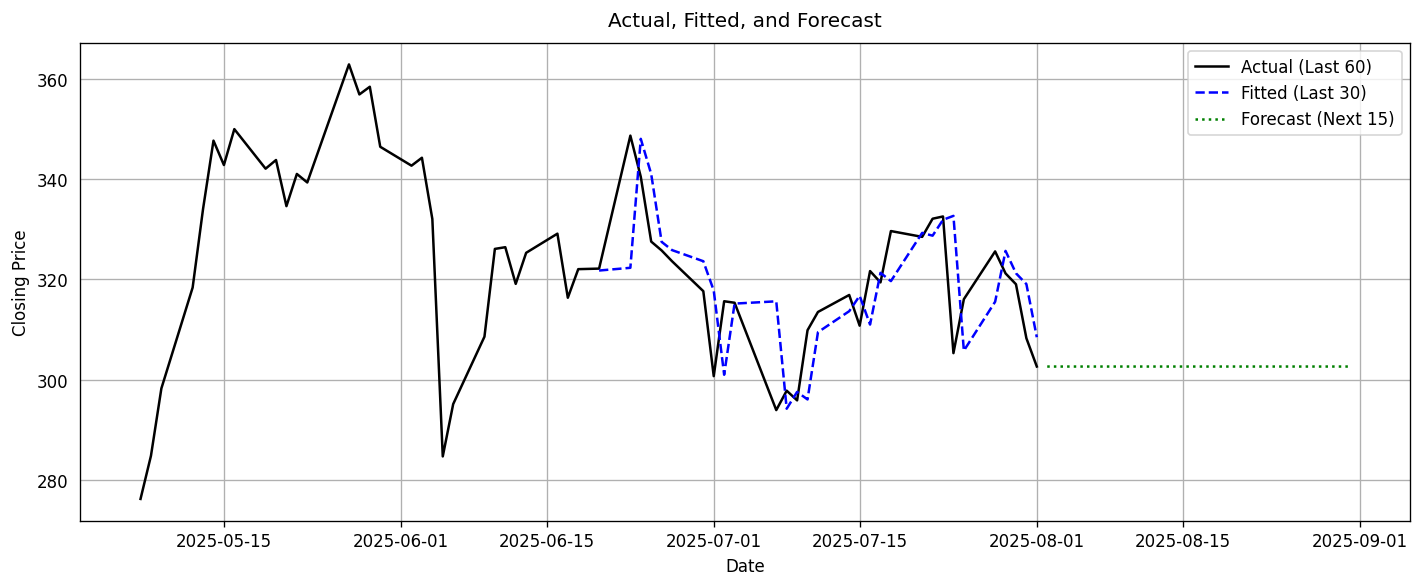

In [ ]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Build future index
last_date = df.index[-1]
future_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Plot actual + forecast
plt.figure(figsize=(12, 5))
plt.plot(df.index[-60:], df['Close'].iloc[-60:], label='Actual (Last 60)', color='black')
plt.plot(last_30.index, fitted_last_30, label='Fitted (Last 30)', linestyle='--', color='blue')
plt.plot(future_index, forecast, label='Forecast (Next 15)', linestyle=':', color='green')
plt.title('Actual, Fitted, and Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Let's Fit AutoArima Model

In [ ]:
df.drop(columns=['MA_1W','MA_1M','MA_weekly'	,'MA_monthly'],inplace=True)

In [ ]:
df.shape

(1256, 1)

In [ ]:
df.head()

,Close
Date,
2020-08-03,99.000000
2020-08-04,99.133331
2020-08-05,99.001335
2020-08-06,99.305336
2020-08-07,96.847336


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

sns.set_style("darkgrid")

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import pmdarima as pm
# from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
import pmdarima as pm
# from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
train_size = int(len(df)* 0.8)
train , test = df.iloc[:train_size],df.iloc[train_size:]

In [ ]:
arima_model = pm.auto_arima(train,seasonal = False,
                            stepwise = True, suppress_warnings = True,
                            trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7241.749, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7234.767, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7236.131, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7236.139, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7232.960, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7237.750, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.573 seconds


In [ ]:
from pmdarima.arima import auto_arima

# Refit the model if not already saved
model = auto_arima(df['Close'], seasonal=False, stepwise=True, trace=True)

# Fit to the data
model_fit = model.fit(df['Close'])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9333.085, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9325.959, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9327.693, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9327.699, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9324.294, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9329.102, Time=1.66 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.280 seconds


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


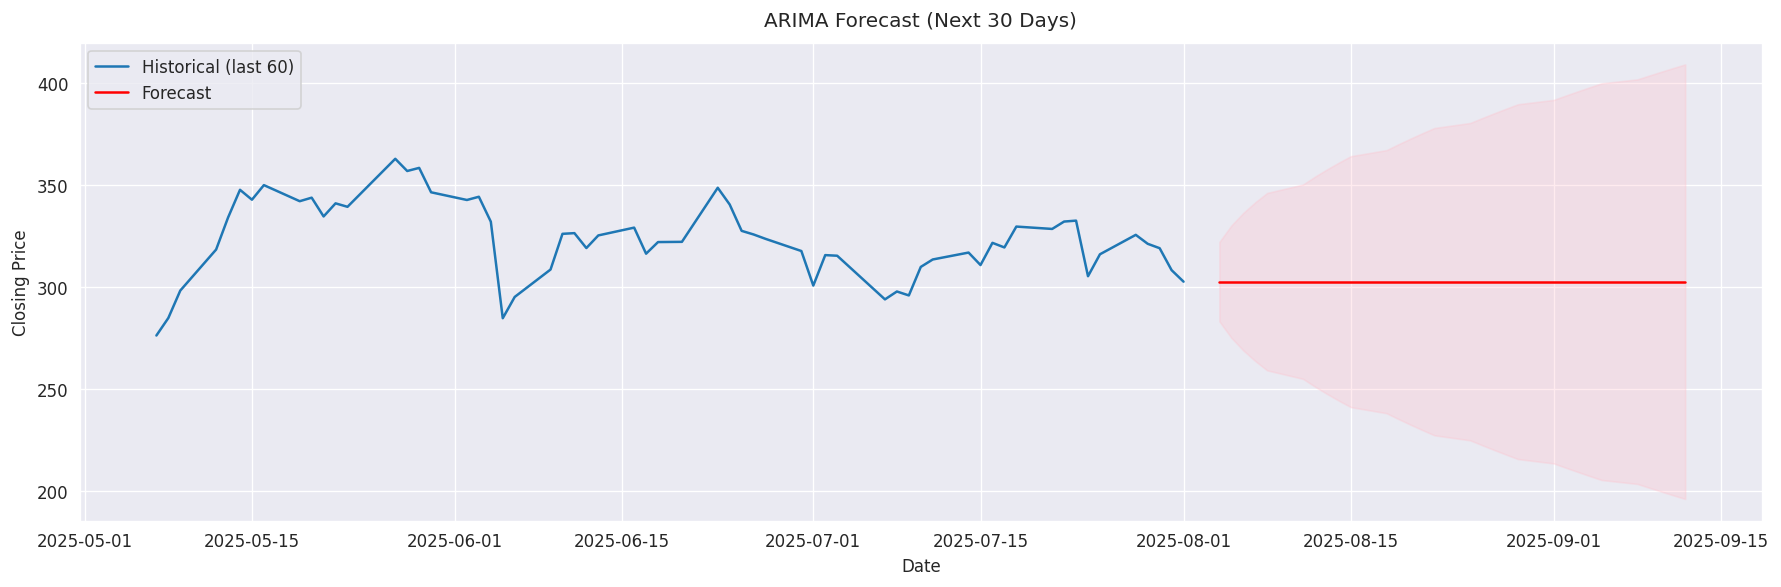

In [ ]:
import matplotlib.pyplot as plt

# Forecast next 30 steps
n_periods = 30
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create index for forecast
forecast_index = pd.date_range(df.index[-1], periods=n_periods+1, freq='B')[1:]

# Plot
plt.figure(figsize=(15, 5))
plt.plot(df[-60:], label='Historical (last 60)')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


p = 0: No autoregressive terms (doesn't depend on past values).

d = 1: First-order differencing was required to make the series stationary.

q = 0: No moving average terms (doesn't model noise from past errors).

This is essentially a random walk model, which means:

Tomorrow’s price is just today’s price plus a random shock.

Let's Change this problem into Supervised Learning.

In [ ]:
def create_supervised_data(series, n_lags=3):
    """
    Create a supervised learning dataset from a univariate time series.

    Parameters:
        series (pd.Series): Original time series
        n_lags (int): Number of lag observations to use as features

    Returns:
        pd.DataFrame: Supervised learning dataframe
    """
    df = pd.DataFrame(series)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

# Apply the transformation
supervised_df = create_supervised_data(df['Close'], n_lags=3)
supervised_df.head()

,Close,lag_1,lag_2,lag_3
Date,,,,
2020-08-06,99.305336,99.001335,99.133331,99.000000
2020-08-07,96.847336,99.305336,99.001335,99.133331
2020-08-10,94.571335,96.847336,99.305336,99.001335
2020-08-11,91.625999,94.571335,96.847336,99.305336
2020-08-12,103.650665,91.625999,94.571335,96.847336


In [ ]:
# Re-split the lagged supervised data
train_size = int(len(supervised_df) * 0.8)
train_df = supervised_df.iloc[:train_size]
test_df = supervised_df.iloc[train_size:]

# Features and targets
X_train, y_train = train_df.drop('Close', axis=1), train_df['Close']
X_test, y_test = test_df.drop('Close', axis=1), test_df['Close']

In [ ]:
# Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
# Normalize using only train
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [ ]:
# Sliding window creation
def create_dataset(data, lookback=12):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 12
X_train, y_train = create_dataset(train_scaled, lookback)
X_test, y_test = create_dataset(np.vstack([train_scaled[-lookback:], test_scaled]), lookback)

In [ ]:
# Reshape to [samples, time steps, features]
X_train = X_train.reshape(-1, lookback, 1)
X_test = X_test.reshape(-1, lookback, 1)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, RepeatVector, TimeDistributed, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(lookback, 1)),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 12, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,433 (212.63 KB)

 Trainable params: 54,433 (212.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = model.fit(X_train, y_train,
                    epochs=400,
                    batch_size=16,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
                    verbose=1)

Epoch 1/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0390 - val_loss: 0.0035
Epoch 2/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 3/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 4/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 5/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 6/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 7/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 8/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 9.9742e-04
Epoch 10/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 11/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 9.7586e-04
Epoch 12/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

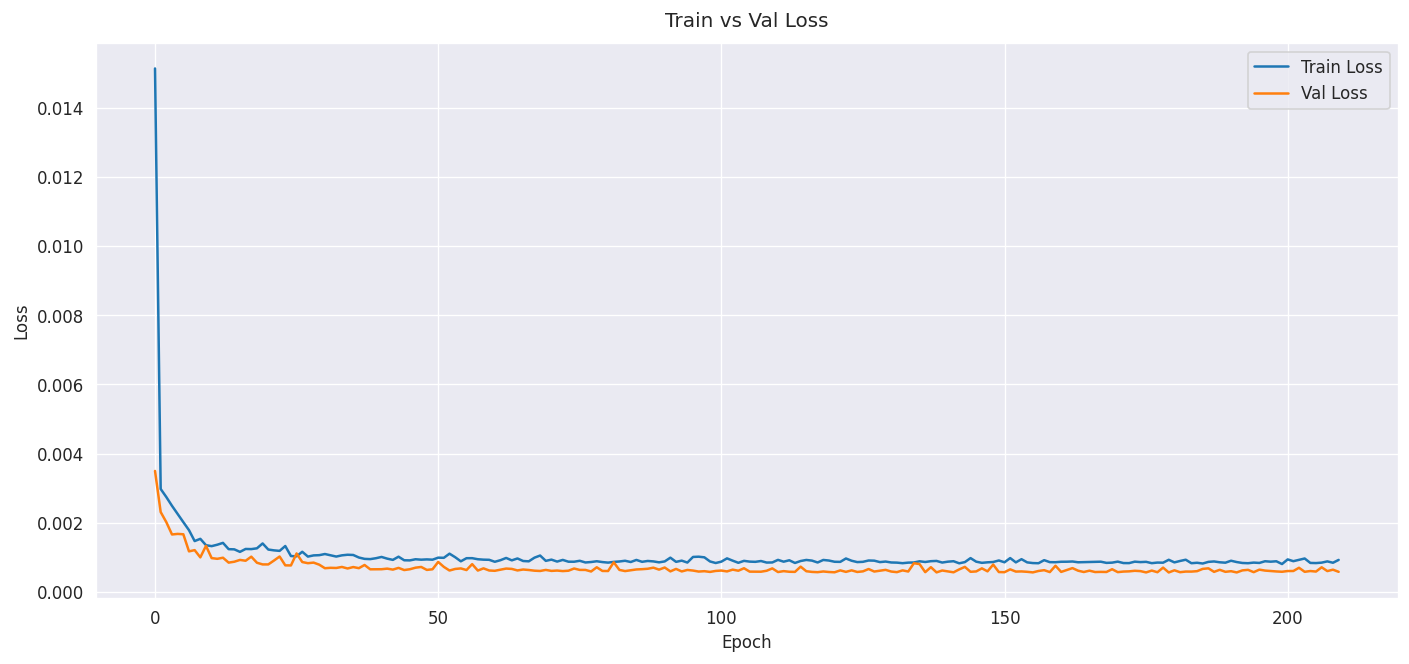

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Train vs Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


In [ ]:
# Evaluate
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAE: {mae_lstm:.2f}")

LSTM RMSE: 14.01
LSTM MAE: 10.21


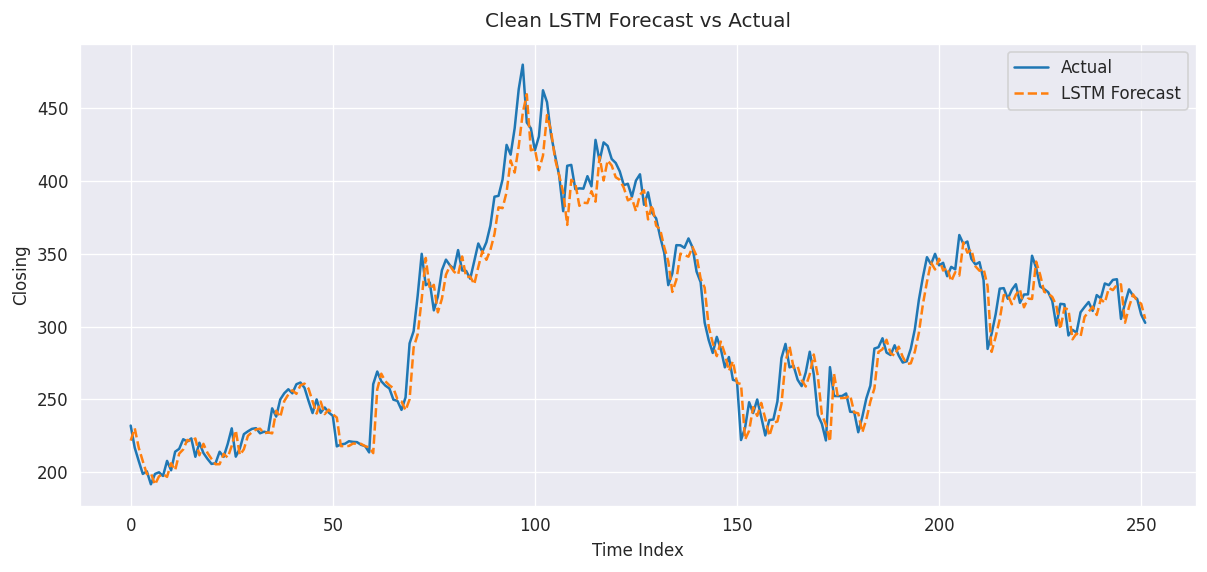

In [ ]:
# 9. Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='LSTM Forecast', linestyle='--')
plt.title("Clean LSTM Forecast vs Actual")
plt.xlabel("Time Index")
plt.ylabel("Closing")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Sequence generation

def create_encoder_decoder_data(input_data, target_data, input_len=12, output_len=12):
    X, y = [], []
    total_len = input_len + output_len
    for i in range(len(input_data) - total_len + 1):
        X.append(input_data[i:i+input_len])
        y.append(target_data[i+input_len:i+input_len+output_len])
    return np.array(X), np.array(y)

input_len = 12
output_len = 12

# Extend test with tail of train for full context
combined_data = np.vstack([train_scaled, test_scaled])
X_all, y_all = create_encoder_decoder_data(combined_data, combined_data, input_len, output_len)

In [ ]:
# Train/test split for sequences

X_train, y_train = X_all[:len(train_scaled)-input_len-output_len+1], y_all[:len(train_scaled)-input_len-output_len+1]
X_test, y_test = X_all[len(train_scaled)-input_len-output_len+1:], y_all[len(train_scaled)-input_len-output_len+1:]

In [ ]:
n_features = 1
encoder_inputs = Input(shape=(input_len, n_features))
encoder_lstm, state_h, state_c = LSTM(100, return_state=True)(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = RepeatVector(output_len)(encoder_lstm)
decoder_lstm = LSTM(100, return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = TimeDistributed(Dense(1))
decoder_outputs = decoder_dense(decoder_outputs)

model = Model(encoder_inputs, decoder_outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 12, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 100),     │     40,800 │ input_layer_1[0]… │
│                     │ (None, 100),      │            │                   │
│                     │ (None, 100)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 12, 100)   │          0 │ lstm_2[0][0]      │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 12, 100)   │     80,400 │ repeat_vector[0]… │
│                     │                   │            │ lstm_2[0][1],     │
│                     │                   │            │ lstm_2[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, 12, 1)     │        101 │ lstm_3[0][0]      │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=400,
                    batch_size=16,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
                    verbose=1)

Epoch 1/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0600 - val_loss: 0.0052
Epoch 2/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 3/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - val_loss: 0.0049
Epoch 4/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 5/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 6/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 7/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0071 - val_loss: 0.0042
Epoch 8/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - val_loss: 0.0044
Epoch 9/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - val_loss: 0.0042
Epoch 10/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0058 - val_loss: 0.0042
Epoch 11/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0040
Epoch 12/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

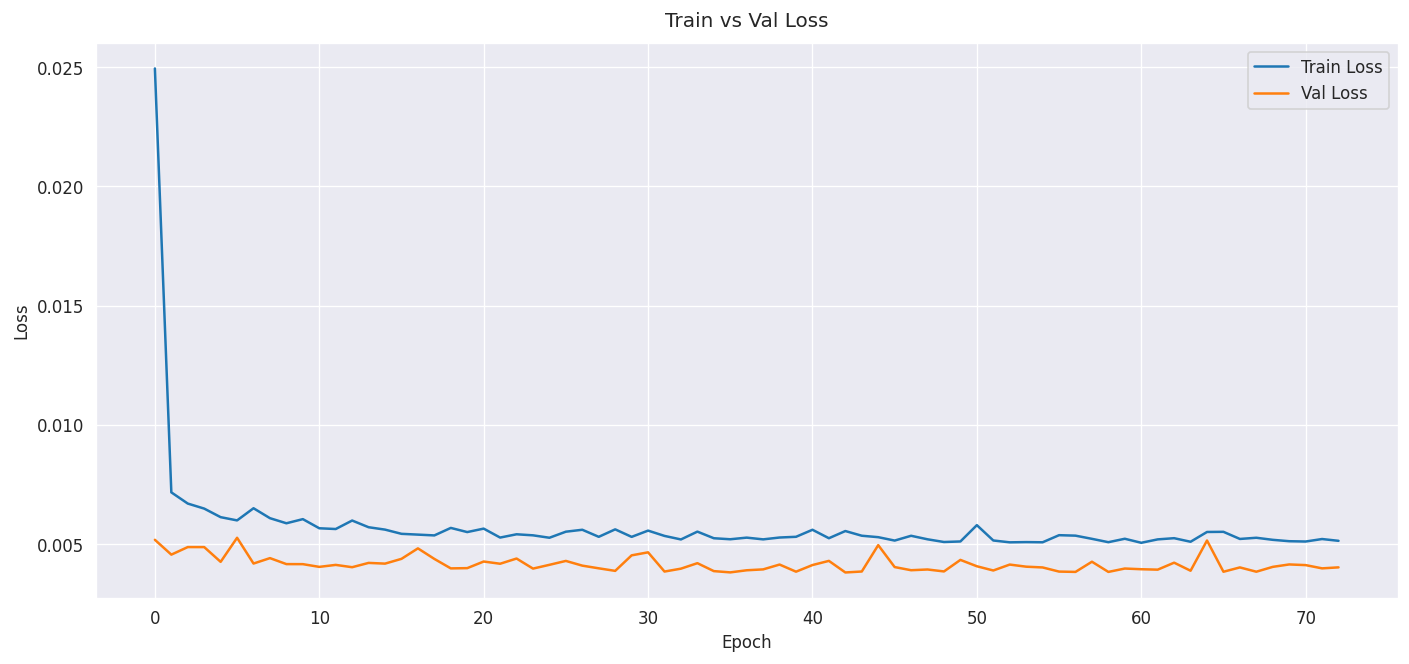

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Train vs Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


In [ ]:
# Evaluate only the last predicted step of each sequence (optional)
rmse_ed = np.sqrt(mean_squared_error(y_test_inv[:, -1], y_pred_inv[:, -1]))
mae_ed = mean_absolute_error(y_test_inv[:, -1], y_pred_inv[:, -1])

print(f"Encoder-Decoder RMSE (last step): {rmse_ed:.2f}")
print(f"Encoder-Decoder MAE (last step): {mae_ed:.2f}")

Encoder-Decoder RMSE (last step): 47.21
Encoder-Decoder MAE (last step): 36.28


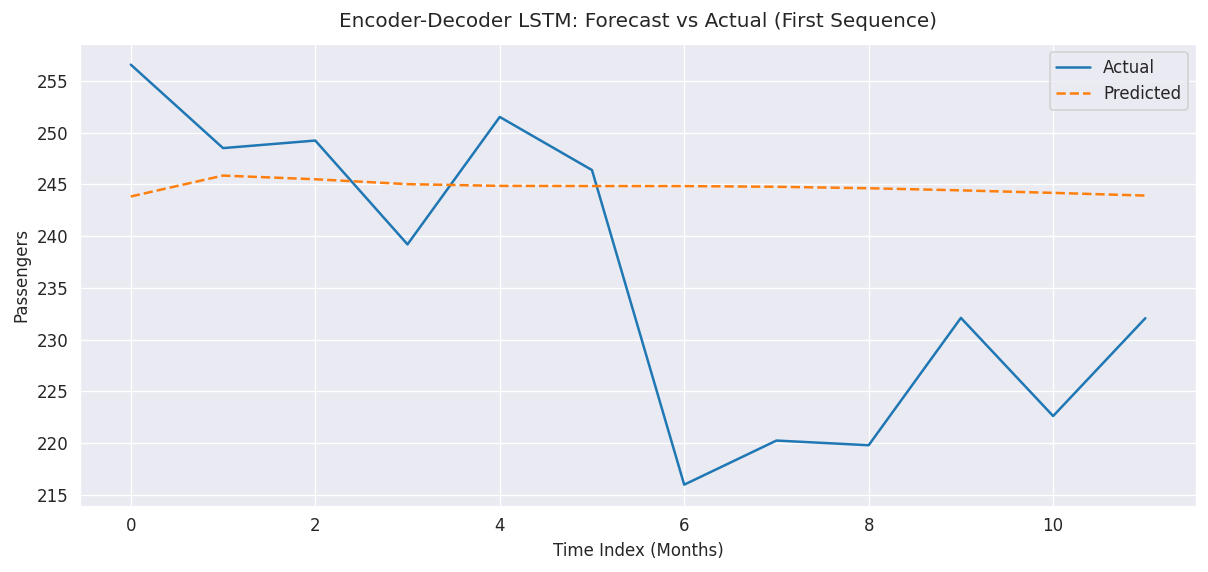

In [ ]:
# 8. Plot one full prediction vs ground truth

plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[0], label='Actual')
plt.plot(y_pred_inv[0], label='Predicted', linestyle='--')
plt.title("Encoder-Decoder LSTM: Forecast vs Actual (First Sequence)")
plt.xlabel("Time Index (Months)")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import display

results = {
    "Model": [ "LSTM","Encoder-Decoder"],
    "RMSE": [rmse_lstm, rmse_ed],
    "MAE":  [ mae_lstm, mae_ed]
}

results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
display(results_df)

,RMSE,MAE
Model,,
LSTM,14.014577,10.206465
Encoder-Decoder,47.209232,36.276141
